In [27]:
#Please install the package as per your requirement :)
#!pip install openai==1.10.0
#!pip install langchain==0.1.4
#!pip install chromadb==0.4.22
#!pip install sentence_transformers==2.3.0

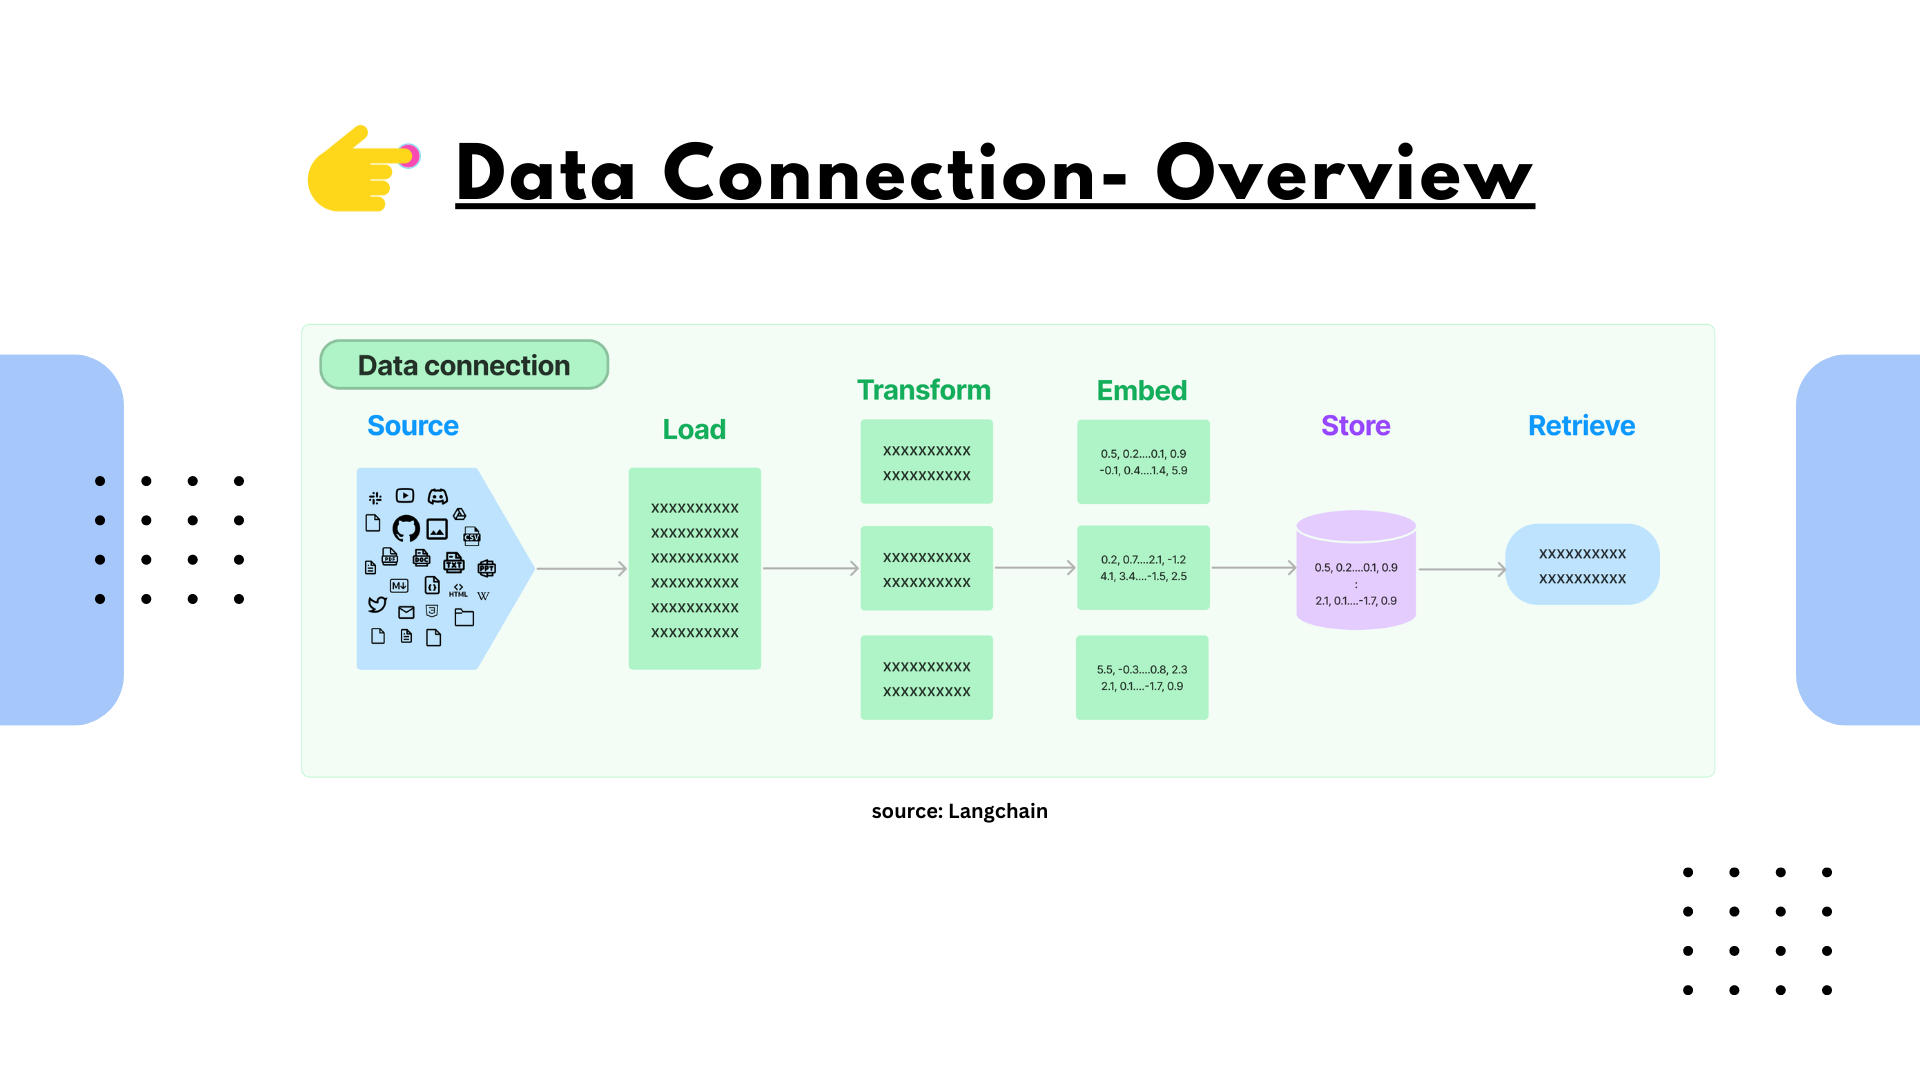

In [28]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA
from langchain.embeddings.sentence_transformer import SentenceTransformerEmbeddings

## Document loaders
#### Load documents from many different sources

In [29]:
loader = TextLoader(r'./data/Sample.txt')
documents = loader.load()

In [30]:
len(documents)

1

## Document transformers
#### Split document and drop redundant documents

In [31]:
text_splitter = CharacterTextSplitter (chunk_size=200,
chunk_overlap=0)

texts= text_splitter.split_documents(documents)

Created a chunk of size 719, which is longer than the specified 200
Created a chunk of size 450, which is longer than the specified 200
Created a chunk of size 203, which is longer than the specified 200
Created a chunk of size 274, which is longer than the specified 200
Created a chunk of size 228, which is longer than the specified 200
Created a chunk of size 574, which is longer than the specified 200
Created a chunk of size 235, which is longer than the specified 200
Created a chunk of size 244, which is longer than the specified 200
Created a chunk of size 213, which is longer than the specified 200
Created a chunk of size 282, which is longer than the specified 200


In [32]:
len(texts)

31

In [33]:
texts

[Document(page_content='India at a Glance\nBackground\nIndia has a unique culture and is one of the oldest and greatest civilizations of the world. India has achieved all-round socio-economic progress since its Independence. India covers an area of 32,87,263 sq. km, extending from the snow-covered Himalayan heights to the tropical rain forests of the south. As the 7th largest country in the world, India stands apart from the rest of Asia, marked off as it is by mountains and the sea, which give the country a distinct geographical entity. Bounded by the Great Himalayas in the north, it stretches southwards and at the Tropic of Cancer, tapers off into the Indian Ocean between the Bay of Bengal on the east and the Arabian Sea on the west.', metadata={'source': './data/Sample.txt'}),
 Document(page_content="Lying entirely in the northern hemisphere, the mainland extends between latitudes 8Â° 4' and 37Â° 6' north, longitudes 68Â° 7' and 97Â° 25' east and measures about 3,214 km from north t

## Text embedding models
#### Take unstructured text and turn it into a list of floating point numbers

<font color='green'>
A sentence-transformers model is designed to transform sentences and paragraphs into a high-dimensional vector space of 384 dimensions. This model is particularly useful for tasks such as clustering or semantic search, where the vector representations can be employed to measure similarity and perform efficient retrieval operations.
<font>

In [1]:
from dotenv import load_dotenv
load_dotenv()
#embeddings=OpenAIEmbeddings()

True

In [35]:
# %pip install sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [36]:
embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

## Vector stores
#### Store and search over embedded data

<font color='green'>
An AI-native open-source embedding database, designed to make it easy to build LLM apps by making knowledge, facts, and skills pluggable for LLMs. It is free to use under an Apache 2.0 license.
<font>

#### Load Embeddings of Text into Chroma

In [37]:
db = Chroma.from_documents(texts, embeddings)

#### Let's have a look at embeddings - Numeric representation

In [38]:
db._collection.get(include=['embeddings'])

{'ids': ['8b1c9a27-e15a-11ee-b1a1-f889d2ef9b12',
  '8b1c9a28-e15a-11ee-8e1b-f889d2ef9b12',
  '8b1c9a29-e15a-11ee-8005-f889d2ef9b12',
  '765927ff-e15b-11ee-8b2e-f889d2ef9b12',
  '76592800-e15b-11ee-985a-f889d2ef9b12',
  '76592801-e15b-11ee-bd38-f889d2ef9b12',
  '76592802-e15b-11ee-b101-f889d2ef9b12',
  '76592803-e15b-11ee-aa50-f889d2ef9b12',
  '76592804-e15b-11ee-a587-f889d2ef9b12',
  '76592805-e15b-11ee-a7c5-f889d2ef9b12',
  '76592806-e15b-11ee-b559-f889d2ef9b12',
  '76592807-e15b-11ee-8418-f889d2ef9b12',
  '76592808-e15b-11ee-b16f-f889d2ef9b12',
  '76592809-e15b-11ee-a693-f889d2ef9b12',
  '7659280a-e15b-11ee-bd86-f889d2ef9b12',
  '7659280b-e15b-11ee-b376-f889d2ef9b12',
  '7659280c-e15b-11ee-8f6e-f889d2ef9b12',
  '7659280d-e15b-11ee-b2a4-f889d2ef9b12',
  '7659280e-e15b-11ee-b258-f889d2ef9b12',
  '7659280f-e15b-11ee-ac9a-f889d2ef9b12',
  '76592810-e15b-11ee-9261-f889d2ef9b12',
  '76592811-e15b-11ee-8410-f889d2ef9b12',
  '76592812-e15b-11ee-a1d0-f889d2ef9b12',
  '76592813-e15b-11ee-a316-

## Retrievers
#### Query your data

<font color='green'>
A vector store retriever is a retrieval system that utilizes a vector store to fetch documents. It acts as a simplified interface to the Vector Store class, adapting it to adhere to the Retriever interface. By leveraging the search functionalities provided by the vector store, such as similarity search and Maximal Marginal Relevance (MMR), the vector store retriever conducts queries on the text data contained within the vector store.
<font>

<font color='green'>
You can also specify 'search kwargs' value k as 1,2,3 ..... to use when doing retrieval.
<font>

In [39]:
retriever = db.as_retriever(search_kwargs={"k": 2})

In [40]:
retriever

VectorStoreRetriever(tags=['Chroma', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x00000211367C2A50>, search_kwargs={'k': 2})

## Question 1

<font color='green'>
'get_relevant_documents' function gives out the relevant documnets list, based on your choice you can proceed further
<font>

In [41]:
docs = retriever.get_relevant_documents("What is the capital of india?")

In [42]:
docs

[Document(page_content='India at a Glance\nBackground\nIndia has a unique culture and is one of the oldest and greatest civilizations of the world. India has achieved all-round socio-economic progress since its Independence. India covers an area of 32,87,263 sq. km, extending from the snow-covered Himalayan heights to the tropical rain forests of the south. As the 7th largest country in the world, India stands apart from the rest of Asia, marked off as it is by mountains and the sea, which give the country a distinct geographical entity. Bounded by the Great Himalayas in the north, it stretches southwards and at the Tropic of Cancer, tapers off into the Indian Ocean between the Bay of Bengal on the east and the Arabian Sea on the west.', metadata={'source': './data/Sample.txt'}),
 Document(page_content='India at a Glance\nBackground\nIndia has a unique culture and is one of the oldest and greatest civilizations of the world. India has achieved all-round socio-economic progress since it

## Question 2

In [43]:
docs = retriever.get_relevant_documents("What is the currency india?")

In [44]:
docs

[Document(page_content='Information about Indian Government\n\nParticulars\tDescription\n\nCountry Name\tRepublic of India; Bharat Ganrajya', metadata={'source': './data/Sample.txt'}),
 Document(page_content='India at a Glance\nBackground\nIndia has a unique culture and is one of the oldest and greatest civilizations of the world. India has achieved all-round socio-economic progress since its Independence. India covers an area of 32,87,263 sq. km, extending from the snow-covered Himalayan heights to the tropical rain forests of the south. As the 7th largest country in the world, India stands apart from the rest of Asia, marked off as it is by mountains and the sea, which give the country a distinct geographical entity. Bounded by the Great Himalayas in the north, it stretches southwards and at the Tropic of Cancer, tapers off into the Indian Ocean between the Bay of Bengal on the east and the Arabian Sea on the west.', metadata={'source': './data/Sample.txt'})]

In [45]:
retriever = db.as_retriever(search_kwargs={"k": 3})
retriever
## Question 1

docs = retriever.get_relevant_documents("What is the National Days?")
print(docs.page_)
## Question 2


[Document(page_content="National Days\t26th January (Republic Day)\n\n15th August (Independence Day)\n\n2nd October (Gandhi Jayanti; Mahatma Gandhi's Birthday)", metadata={'source': './data/Sample.txt'}), Document(page_content='Government Type\tSovereign Socialist Democratic Republic with a Parliamentary system of Government.\n\nCapital\tNew Delhi\n\nAdministrative Divisions\t28 States and 8 Union Territories.', metadata={'source': './data/Sample.txt'}), Document(page_content='Information about Indian Government\n\nParticulars\tDescription\n\nCountry Name\tRepublic of India; Bharat Ganrajya', metadata={'source': './data/Sample.txt'})]


In [46]:
docs = retriever.get_relevant_documents("What is the Flag Description?")
print(docs)

[Document(page_content='Flag Description\tThe National Flag is a horizontal tricolour of deep saffron (kesaria) at the top, white in the middle, and dark green at the bottom in equal proportion. At the centre of the white band is a navy blue wheel, which is a representation of the Ashoka Chakra at Sarnath.', metadata={'source': './data/Sample.txt'}), Document(page_content='Information about Indian Government\n\nParticulars\tDescription\n\nCountry Name\tRepublic of India; Bharat Ganrajya', metadata={'source': './data/Sample.txt'}), Document(page_content='Geography\nGeographical information about India\n\nParticulars\tDescription', metadata={'source': './data/Sample.txt'})]
